In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming your dataset is a pandas DataFrame called df
df = pd.read_csv("telecom_anomaly.csv")

# Features and target columns
features = ['Latency', 'Packet_Loss_Rate', 'Signal_Strength', 'Interference_Level', 'Energy_Efficiency', 
            'Throughput', 'Jitter', 'Bandwidth_Utilization']
target_columns = ['Anomaly']  
X = df[features].values
y = df[target_columns].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model using Keras
model = Sequential()

# Add layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # input layer
model.add(Dense(32, activation='relu'))  # hidden layer
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define a callback to print F1 score after each epoch
def f1_score_callback(epoch, logs):
    from sklearn.metrics import f1_score
    y_pred = (model.predict(X_test) > 0.5).astype(int)  # convert predictions to binary labels
    f1 = f1_score(y_test, y_pred, average='macro')  # macro F1 score
    print(f"Epoch {epoch+1} - Validation F1: {f1:.4f}")

f1_callback = LambdaCallback(on_epoch_end=f1_score_callback)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[f1_callback])

# Generate classification report after training



Epoch 1/50


/home/alif/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-07 22:00:52.987877: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   - acc
Epoch 1 - Validation F1: 0.9995
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9852 - loss: 0.0549 - val_accuracy: 0.9999 - val_loss: 4.9758e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   - accuracy:
Epoch 2 - Validation F1: 0.9995
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 4.3117e-04 - val_accuracy: 0.9999 - val_loss: 2.8741e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   - accur
Epoch 3 - Validation F1: 0.9995
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9999 - loss: 2.8403e-04 - val_accuracy: 0.9999 - val_loss: 3.1871e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   - accurac
Epoch 4 - Validation F1: 0.9990
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9999 - loss: 3.0063e-04 - val_accuracy: 0.9998 - val_loss: 3.7540e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.99
Epoch 5 - Validation F1: 0.9992
2500/2500 ━━━━━━━━━━━━━━

ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

In [5]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # convert predictions to binary labels
report = classification_report(y_test, y_pred, target_names=["No Anomaly", "Anomaly"])
print(report)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

  No Anomaly       1.00      1.00      1.00     18983
     Anomaly       1.00      1.00      1.00      1017

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

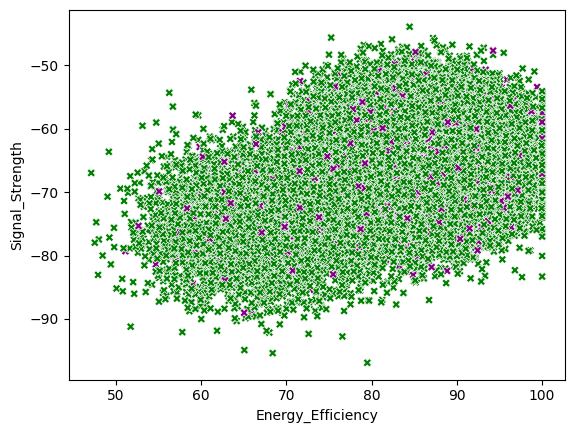

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Assuming 'data' has the 'Energy_Efficiency' and 'Signal_Strength' columns
# and a new column 'Anomaly_NN' to store neural network predictions
df['Anomaly_NN'] = np.concatenate([y_train, y_pred_nn])  # You may need to adjust based on your dataset


# Scatter plot for Neural Network predictions
sns.scatterplot(
    x=df['Energy_Efficiency'], 
    y=df['Signal_Strength'], 
    hue=df['Anomaly_NN'], 
    palette={0: 'green', 1: 'purple'},
    marker='X',
    label="Neural Network"
)

# Title and labels
# plt.title('Comparison of Anomaly Detection: One-Class SVM vs Neural Network')
# plt.xlabel('Energy Efficiency')
# plt.ylabel('Signal Strength')

# Display legend
plt.legend()


# Show the plot
plt.show()
